# Seaborn 소개
<!-- 6-1 -->


1. numpy의 설치
- 가상환경의 선택
- conda install numpy
    Anaconda 설치 경로의 확인:

2. 벡터와 행렬의 생성
    numpy.array 
(1) 리스트를 이용한 벡터의 생성
(2) numpy.zeros(), numpy.ones()
(3) numpy.repeat()
(4) 리스트를 이용한 행렬의 생성
(5) 대각행렬 생성하기 (numpy.diag())

3. 벡터와 행렬의 형태 변환
(1) shape 이해하기
(2) reshape 이해하기 (order = ‘C’ or ‘F’)
----

In [1]:
import seaborn as sns
import pandas as pd

In [3]:
sns.get_dataset_names()
#%%
rdata = sns.load_dataset("diamonds")
# %%
rdata.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#  변수에 대한 설명
#%%
rdata.columns
rdata.groupby('color')[['carat', 'price']].mean()

,carat,price
color,,
D,0.657795,3169.954096
E,0.657867,3076.752475
F,0.736538,3724.886397
G,0.771190,3999.135671
H,0.911799,4486.669196
I,1.026927,5091.874954
J,1.162137,5323.818020


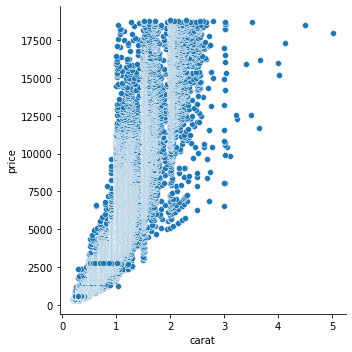

In [5]:
#%%
# draw relplot 1
# Use relplot() to combine scatterplot() and FacetGrid
sns.relplot(data = rdata, x = 'carat', y = 'price')

Text(0.5, 6.79999999999999, '--Carat--')

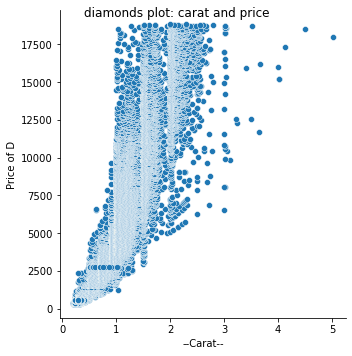

In [6]:

#%% add title 
# 그래픽 객체를 저장한 후에 axes 값을 변경하여 
# 속성을 변경하면 된다. 
diamond_plot = sns.relplot(data = rdata, x = 'carat', y = 'price')
diamond_plot.fig.suptitle("diamonds plot: carat and price")
# axes 객체확인 하기
diamond_plot.axes.flatten()
# 저장하여 필요한 부분을 고친다. 수정할 때 여러가지 method를 활용
# set_xlabel, set_ylabel
a = diamond_plot.axes.flatten()[0]
a.set_ylabel("Price of D")
a.set_xlabel("--Carat--")

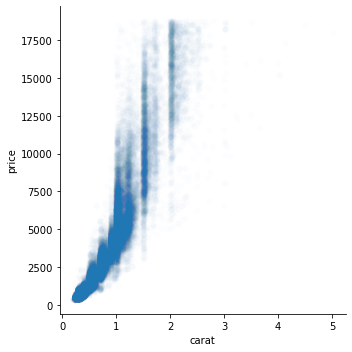

In [7]:

#%%
# 위 그림에서 시각화 결과물의 문제점이 있음 (겹쳐보이는 point)
# 이를 해결하기 위해 alpha값을 조정
sns.relplot(data = rdata, x = 'carat', y = 'price', 
            alpha = 0.01)

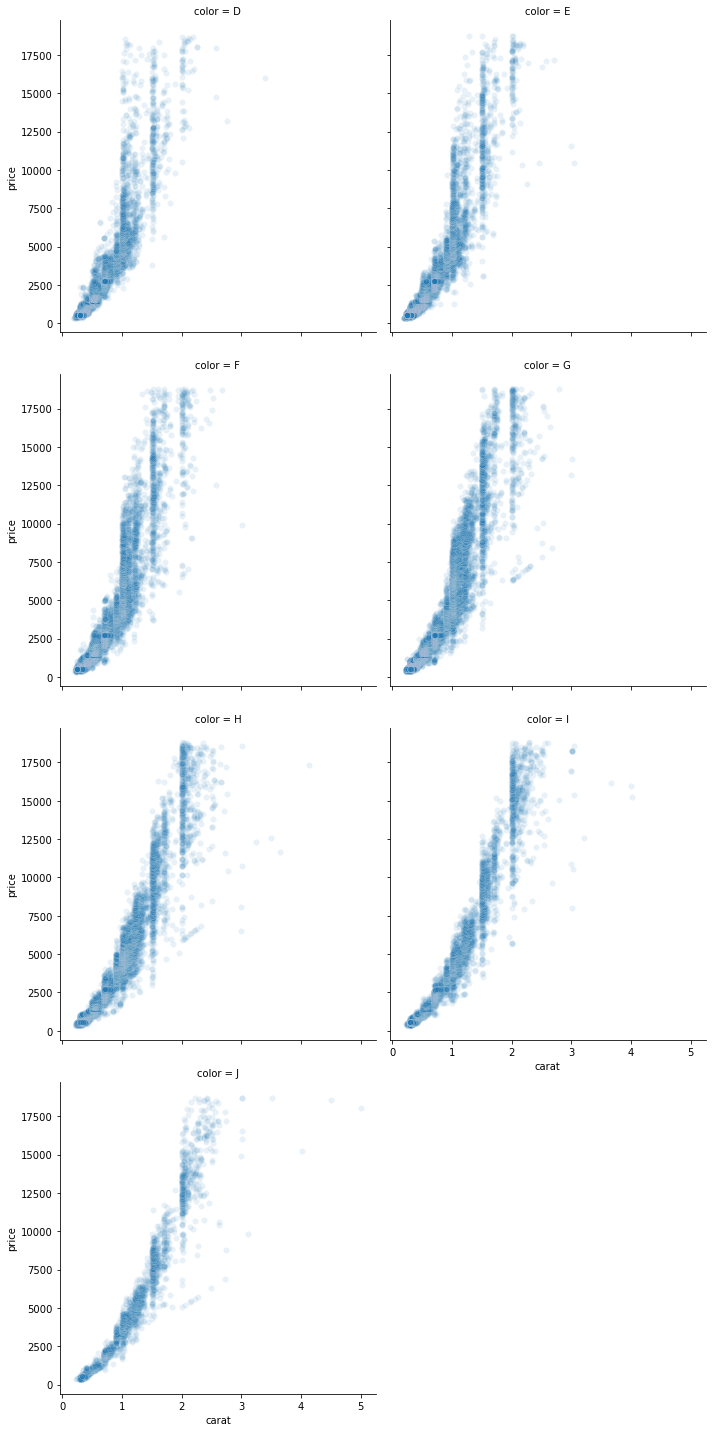

In [8]:
sns.relplot(data = rdata, x = 'carat', y = 'price', 
            col = 'color', col_wrap=2, alpha = 0.1)

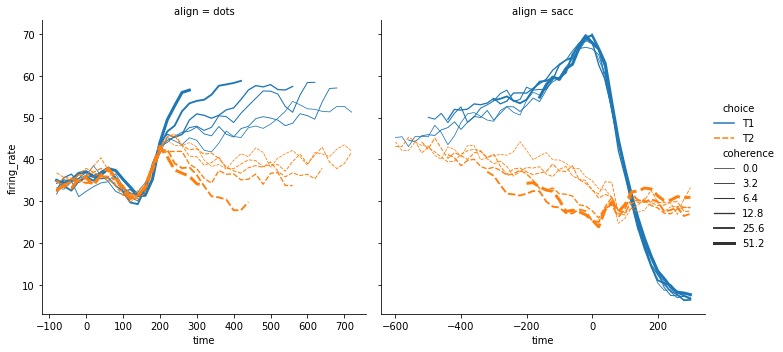

In [10]:
# %%
# line 결과물을 보여주는 plot
# align 변수로 구분되고, 
rdata_dots = sns.load_dataset("dots")
rdata_dots.head()
# dots 데이터에 대한 설명
#%%
sns.relplot(
    data=rdata_dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False))

In [11]:
rdata_fmri = sns.load_dataset("fmri")
# %%
# relplot 에서 kind를 line으로 설정하면 자동으로 statistical inference를 실행한다. 
# local polynomial regression ?
rdata_fmri.head()
print(rdata_fmri["subject"])

0       s13
1        s5
2       s12
3       s11
4       s10
       ... 
1059     s0
1060    s13
1061    s12
1062    s11
1063     s0
Name: subject, Length: 1064, dtype: object


In [12]:
rdata_fmri["subject"].value_counts()
# %%
print ("subject 13 is filetered? ", any(rdata_fmri["subject"]=='s13'))

subject 13 is filetered?  True


In [13]:
idx = rdata_fmri["subject"]=='s13' 
rdata_fmri_13 = rdata_fmri.loc[idx,:] 

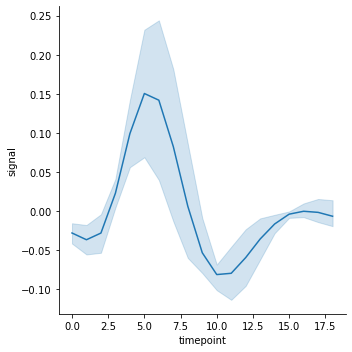

In [14]:

# %%
# CI를 출력
#If True, use statsmodels to estimate a nonparametric lowess model
sns.relplot(data = rdata_fmri_13, x = "timepoint", y = "signal",
            kind = 'line' )

c:\Users\User\anaconda3\envs\tf2\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


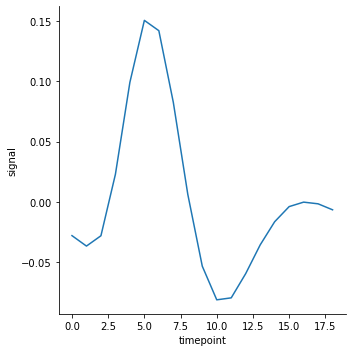

In [15]:
# CI 없이
sns.relplot(data = rdata_fmri_13, x = "timepoint", y = "signal",
            kind = 'line', ci = None)
# 위 결과는 각 timepoint 마다 bootstrap (1만회) 으로 mean을 구한 후에
# 95% CI (2.5%~97.5% 구간) 을 report 함
# 여기에 회귀모형적합은 없음
# loess 회귀모형의 CI와는 다름

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

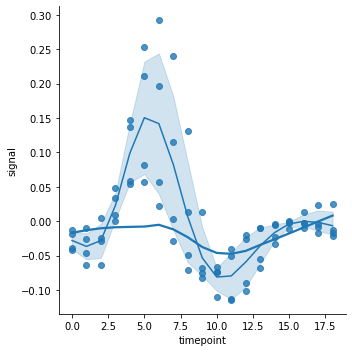

In [16]:
# %%
# statsmodels 패키지 설치 필요
sns.lmplot(data = rdata_fmri_13, x = "timepoint", y = "signal",
           lowess = True)
# statsmodels 패키지 설치 필요
sns.lineplot(data = rdata_fmri_13, x = "timepoint", y = "signal")


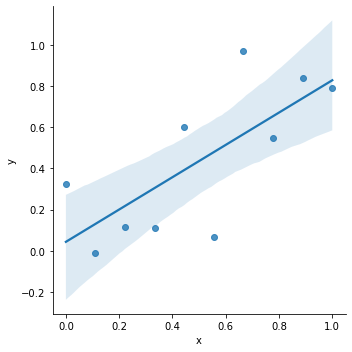

In [17]:
import numpy as np
np.random.seed(1)
x = np.linspace(0.0,1.0, 10)
y = np.sin(x) + np.random.normal(0,0.2, size = len(x))
x = x.reshape((-1,1))
y = y.reshape((-1,1))
xy = np.concatenate((x,y), axis = 1)
tmp = pd.DataFrame(xy, columns = ['x', 'y'])
sns.lmplot(data = tmp, x="x", y="y")
# %%
